In [138]:
import awkward as ak
import hist
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
import numpy as np

In [139]:
filename = "/home/prayag/Coffea/data/3BF5BC57-5D24-1C4D-B277-7B0BAA5DF3C7.root"
events = NanoEventsFactory.from_root(
    filename,
    schemaclass=NanoAODSchema.v7
).events()

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f61a3b9c790>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

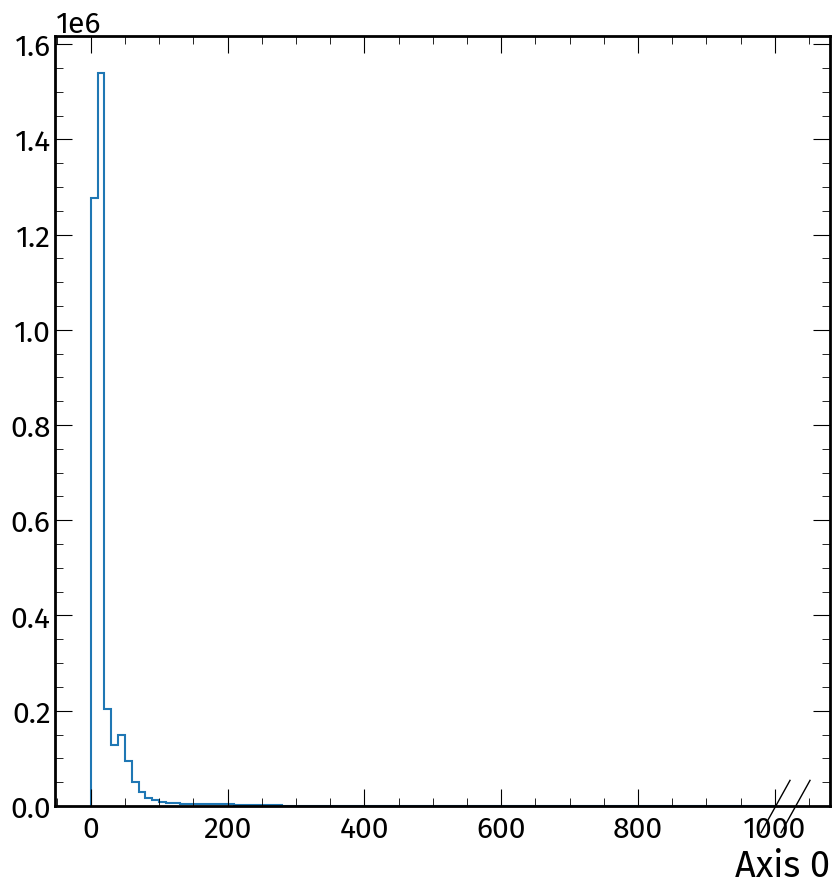

In [140]:
h = hist.Hist.new.Reg(100,0,1000).Double().fill(ak.flatten(events.Jet.pt))
h.plot()

In [141]:
integral = h.sum()
bin_values = h.values()
nbins = len(bin_values)
normed_values = np.array([])
for value in bin_values :
    normed_values = np.append(normed_values, value / integral)
np.sum(normed_values)

0.9999999999999999

In [142]:
a, = h.axes
g = hist.Hist(a).fill(10*h.density())
g

Hist(Regular(100, 0, 1000, label='Axis 0'), storage=Double()) # Sum: 100.0

In [143]:
def normalize(input_hist):
    output_hist = input_hist
    integral = input_hist.sum()
    for bin_index in range(input_hist.size - 2) :
        output_hist[bin_index] = input_hist[bin_index] / integral
    return output_hist

In [144]:
import mplhep as hep
import matplotlib.pyplot as plt
hep.style.use(["CMS","fira","firamath"])

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f61a3c3fa00>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

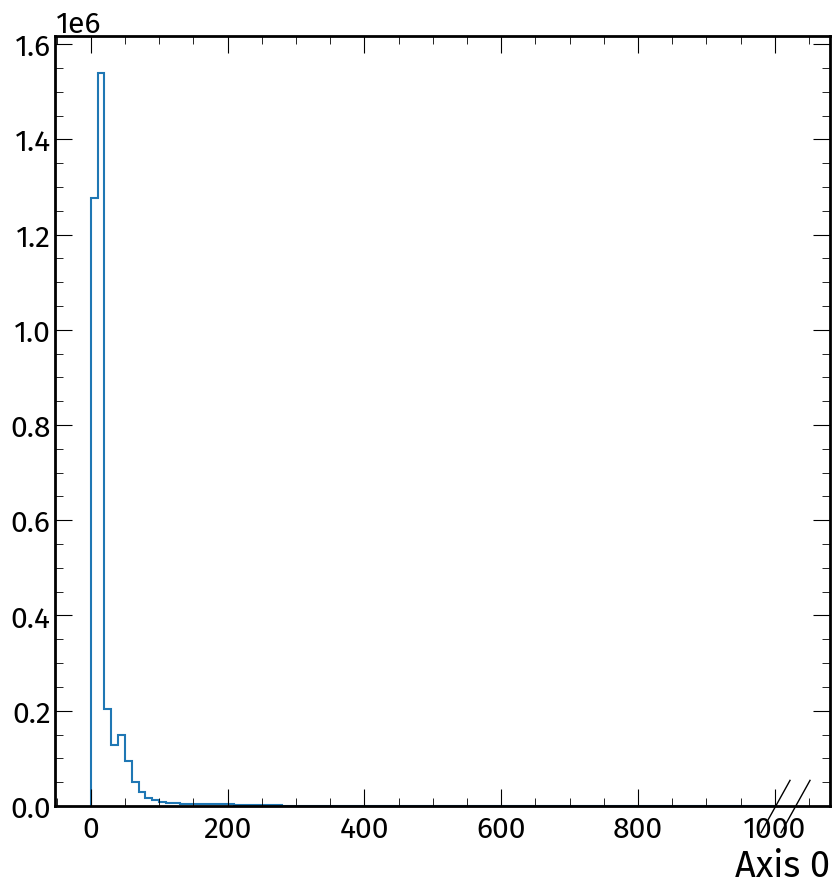

In [145]:
hep.histplot(
    h
)

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f61a4a29a80>, errorbar=None, legend_artist=None)]

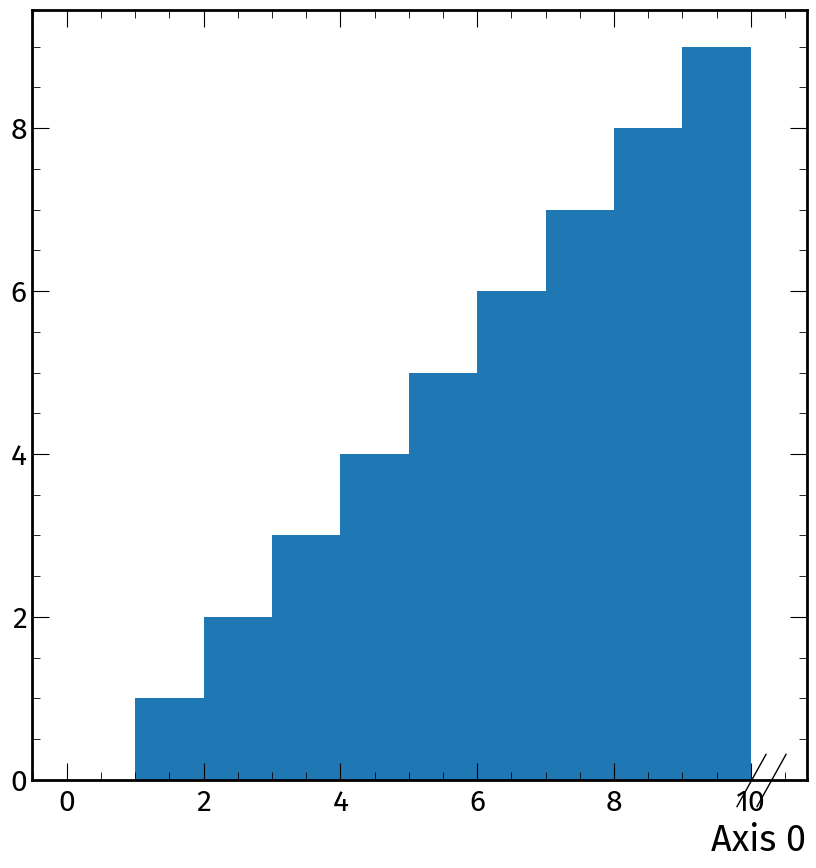

In [148]:
g = hist.Hist.new.Reg(10,0,10).Double()
for i in np.arange(1,11,1):
    for j in range(i):
        g.fill(i)
hep.histplot(
    g,
    histtype="fill"

)

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f6159ec11e0>, errorbar=None, legend_artist=None)]

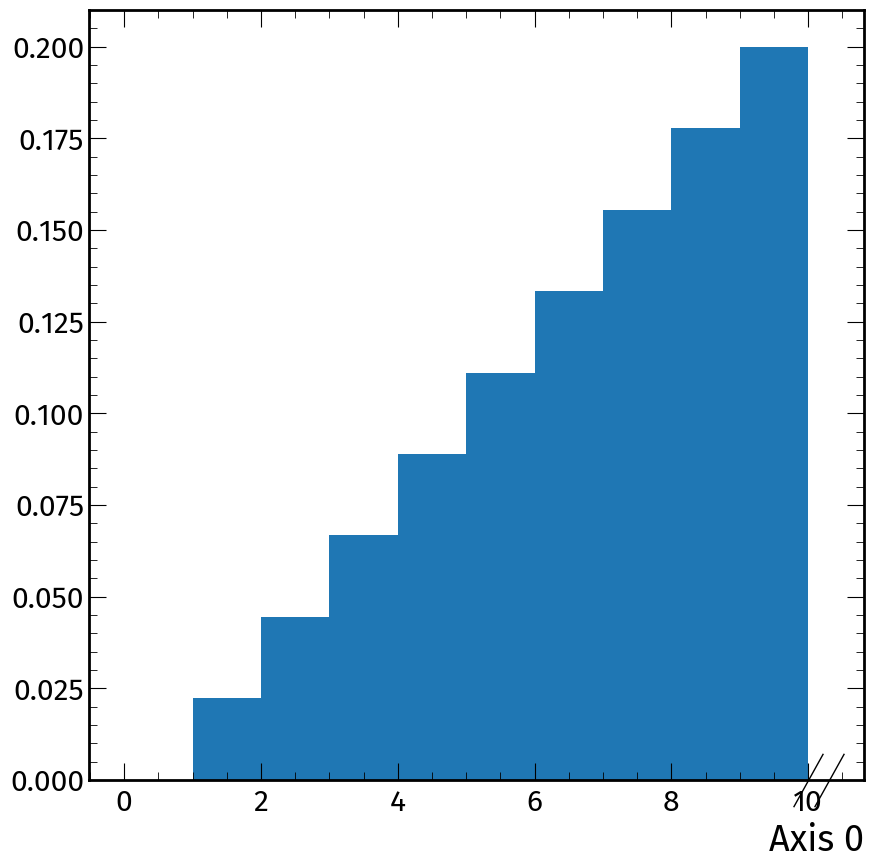

In [149]:
hep.histplot(
    normalize(g),
    histtype="fill"
)